### Imports

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [90]:
df = pd.read_csv('Stars.csv')

In [91]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [92]:
df.shape

(240, 7)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,240.0,10497.462500,9552.425037,1939.00000,3344.250000,5776.0000,15055.5000,40000.00
L,240.0,107188.361635,179432.244940,0.00008,0.000865,0.0705,198050.0000,849420.00
R,240.0,237.157781,517.155763,0.00840,0.102750,0.7625,42.7500,1948.50
A_M,240.0,4.382396,10.532512,-11.92000,-6.232500,8.3130,13.6975,20.06
Type,240.0,2.500000,1.711394,0.00000,1.000000,2.5000,4.0000,5.00


So we dont have any null values lets check for the distribution of data

In [95]:
# numerical columns
numerical_columns = df.dtypes[df.dtypes != 'object']
numerical_columns

Temperature      int64
L              float64
R              float64
A_M            float64
Type             int64
dtype: object

In [96]:
# categorical columns
categorical_columns = df.dtypes[df.dtypes == 'object']
categorical_columns

Color             object
Spectral_Class    object
dtype: object

In [97]:
df['Color'].value_counts()

Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
yellowish               2
Orange                  2
Whitish                 2
Yellowish               1
Blue-White              1
Pale yellow orange      1
Orange-Red              1
White-Yellow            1
Name: Color, dtype: int64

#### We can group all the values with less than 4 values into UNKNOWN category, this will also handle if in future a new color comes up. Also some of the colors are same such as Yellow White and yellowish white

In [98]:
df['Color'].value_counts().index

Index(['Red', 'Blue', 'Blue-white', 'Blue White', 'yellow-white', 'White',
       'Blue white', 'white', 'Yellowish White', 'yellowish', 'Orange',
       'Whitish', 'Yellowish', 'Blue-White', 'Pale yellow orange',
       'Orange-Red', 'White-Yellow'],
      dtype='object')

In [99]:
remap_cat_dict = {
    'Red' : 'Red', 
    'Blue' : 'Blue', 
    'Blue-white' : 'Blue-white', 
    'Blue White' : 'Blue-white', 
    'yellow-white' : 'White-Yellow', 
    'White' : 'White',
    'Blue white' : 'Blue-white', 
    'white' : 'White', 
    'Yellowish White' : 'White-Yellow', 
    'yellowish' : 'Yellow', 
    'Orange' : 'Orange',
    'Whitish' : 'White', 
    'Yellowish' : 'Yellow', 
    'Blue-White' : 'Blue-white', 
    'Pale yellow orange' : 'Orange',
    'Orange-Red' : 'Orange', 
    'White-Yellow' : 'White-Yellow' 
}

In [100]:
df.Color = df.Color.map(remap_cat_dict).astype('category')

In [101]:
df['Color'].value_counts()

Red             112
Blue             56
Blue-white       41
White-Yellow     12
White            12
Orange            4
Yellow            3
Name: Color, dtype: int64

In [102]:
df['Spectral_Class'].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral_Class, dtype: int64

#### One hot encoding

In [103]:
df.shape

(240, 7)

In [104]:
# df = pd.get_dummies(df, drop_first = True)

In [105]:
df.shape

(240, 7)

#### Numerical Columns

In [106]:
numerical_columns

Temperature      int64
L              float64
R              float64
A_M            float64
Type             int64
dtype: object

In [107]:
# def plot_qq(df,feature):
#     plt.figure(figsize = (10,6))
#     plt.subplot(1,2,1)
#     df[feature].hist()
#     plt.subplot(1,2,2)
#     stats.probplot(df[feature], dist= 'norm', plot=pylab)
#     plt.show()

In [108]:
# plot_qq(df,'Temperature')

## Correlation

In [109]:
features = ["Temperature","L","R","A_M"]

In [110]:
corrPearson = df[features].corr(method="pearson")
corrSpearman = df[features].corr(method="spearman")

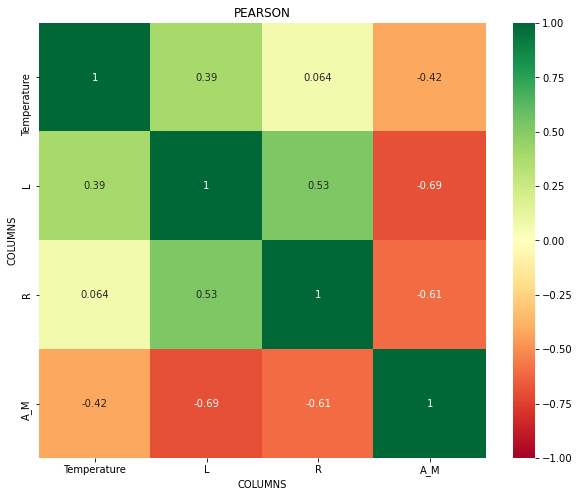

In [111]:
figure = plt.figure(figsize=(10,8))
sns.heatmap(corrPearson,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title("PEARSON")
plt.xlabel("COLUMNS")
plt.ylabel("COLUMNS")
plt.show()

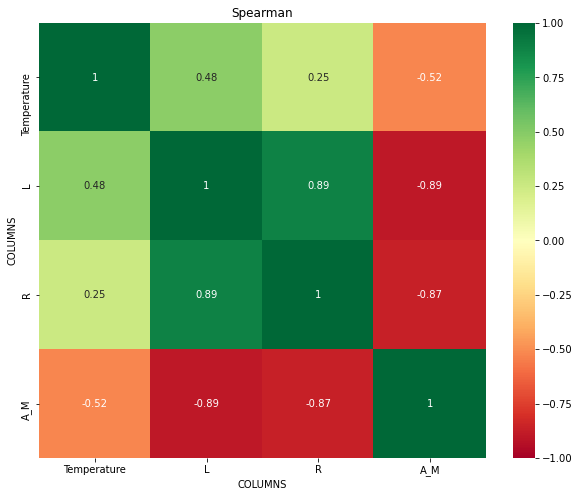

In [112]:
figure = plt.figure(figsize=(10,8))
sns.heatmap(corrSpearman,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title("Spearman")
plt.xlabel("COLUMNS")
plt.ylabel("COLUMNS")
plt.show()

## EDA

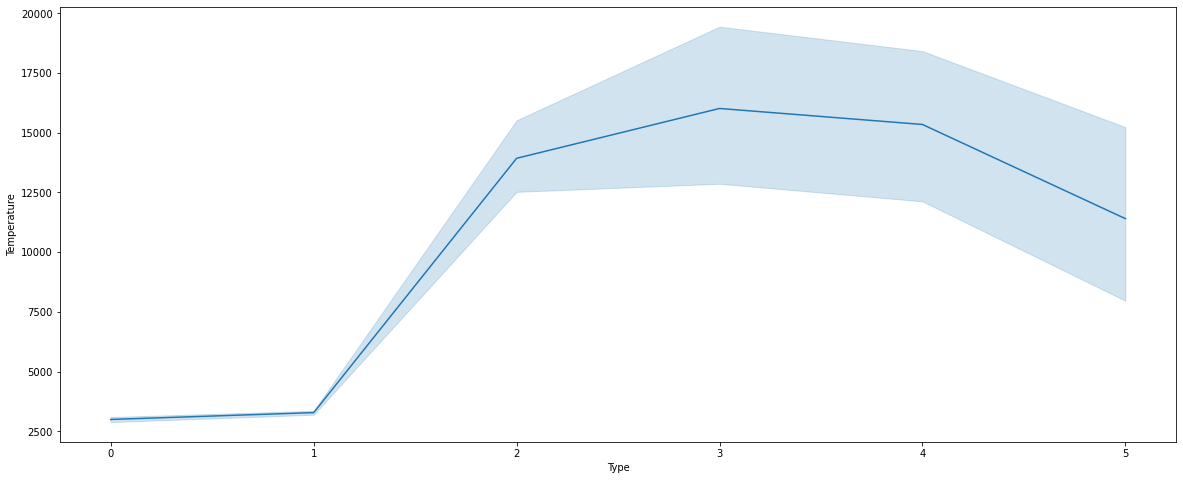

In [113]:
figure = plt.figure(figsize=(20,8))
sns.lineplot(x="Type",y="Temperature",data=df)
plt.show()

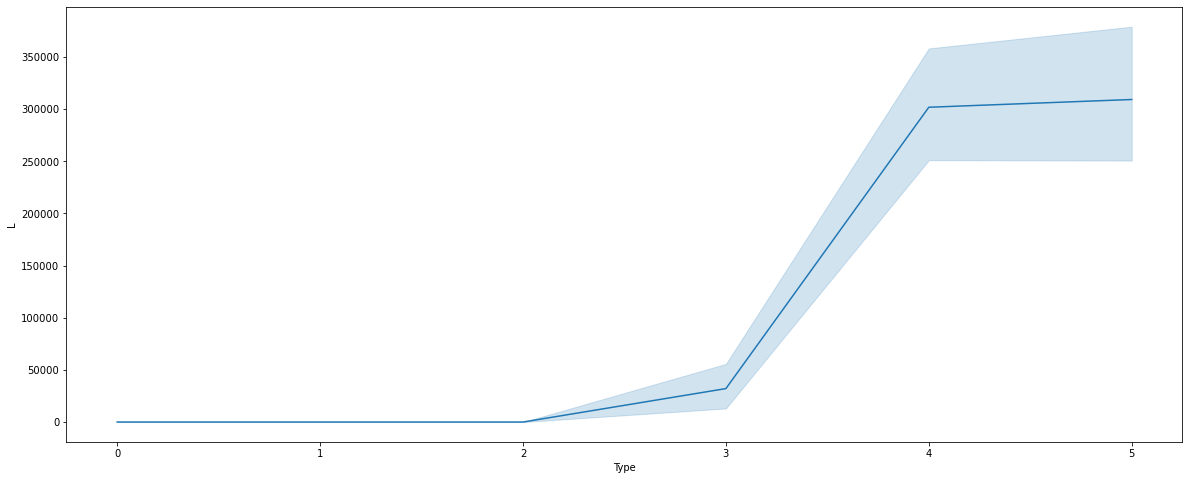

In [114]:
figure = plt.figure(figsize=(20,8))
sns.lineplot(x="Type",y="L",data=df)
plt.show()

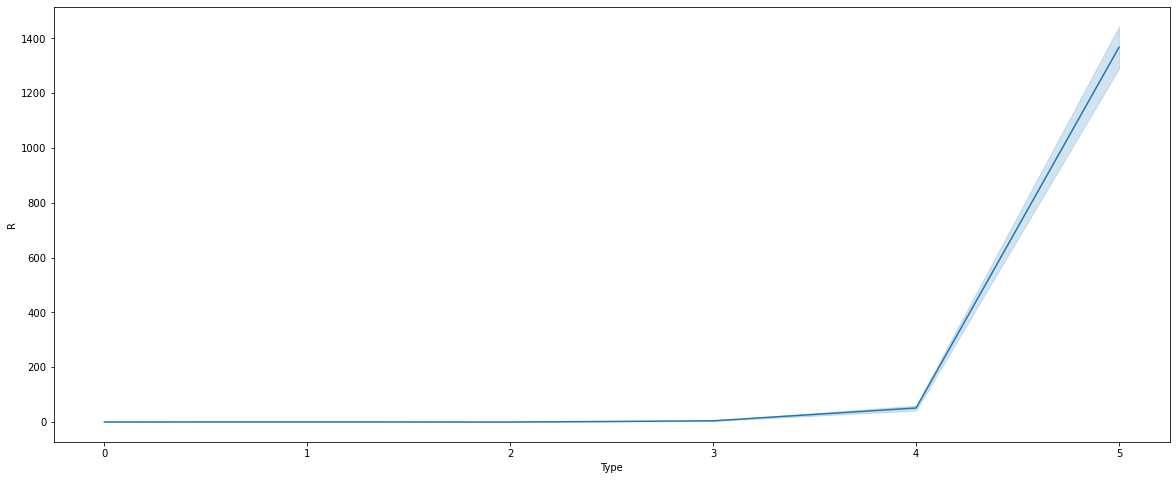

In [115]:
figure = plt.figure(figsize=(20,8))
sns.lineplot(x="Type",y="R",data=df)
plt.show()

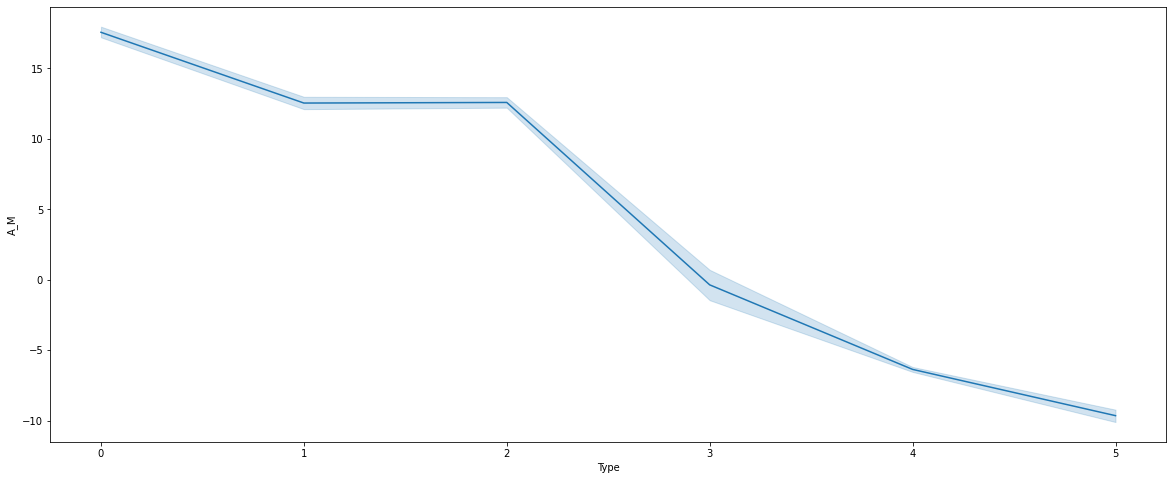

In [116]:
figure = plt.figure(figsize=(20,8))
sns.lineplot(x="Type",y="A_M",data=df)
plt.show()

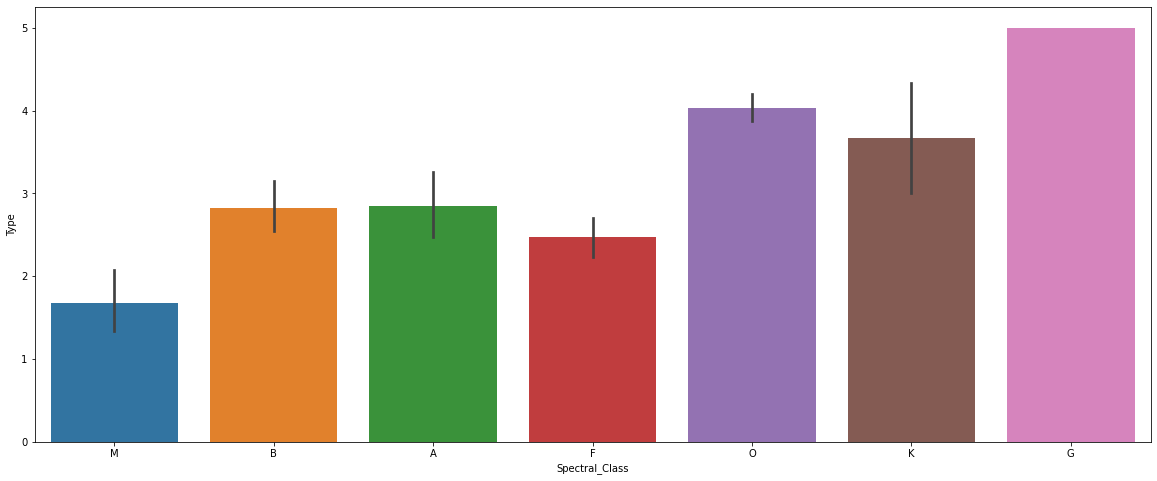

In [120]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x="Spectral_Class",y="Type",data=df)
plt.show()

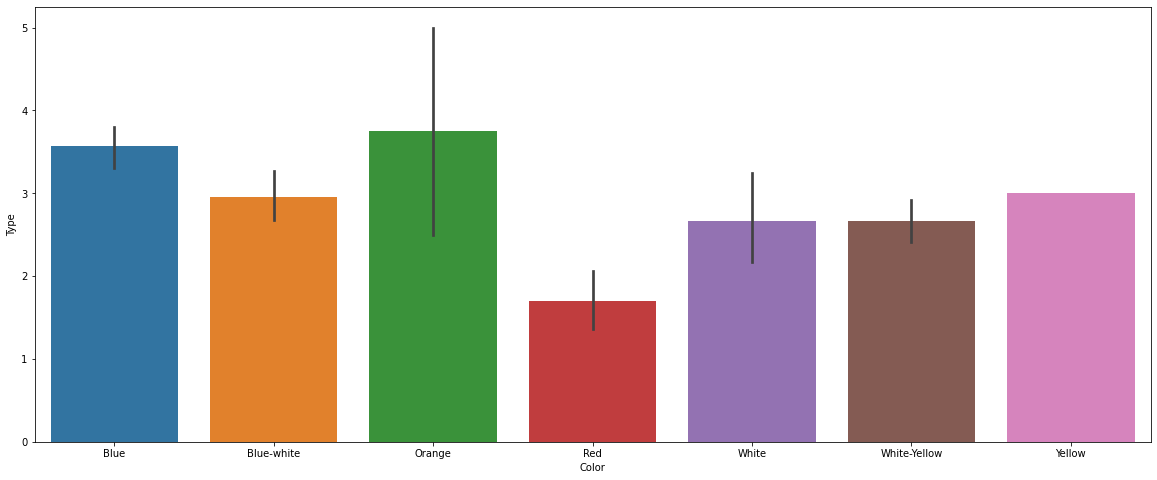

In [119]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x="Color",y="Type",data=df)
plt.show()

### Observations
#### Features are not normally Distributed

#### One hot encoding

In [129]:
df = pd.get_dummies(df, drop_first = True)

In [122]:
### A_M is highly correlated with temp, L and R
### A_M feature is inversely proportional to all the above features

In [125]:
from sklearn.model_selection import train_test_split

In [130]:
X = df.drop(['Type'], axis = 1)

In [131]:
X.head()

,Temperature,L,R,A_M,Color_Blue-white,Color_Orange,Color_Red,Color_White,Color_White-Yellow,Color_Yellow,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,0,0,1,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,1,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,1,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,1,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,1,0,0,0,0,0,0,0,1,0


In [132]:
y = df['Type']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [134]:
X_train.shape

(160, 16)

In [136]:
X_test.shape

(80, 16)

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
sc = StandardScaler()

In [139]:
X_train_scaled = sc.fit_transform(X_train)

In [141]:
X_test_scaled = sc.transform(X_test)

## Models

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
# from sklearn.metrics import mean_squared_error, r2_score

In [144]:
lj = LogisticRegression(solver="liblinear").fit(X_train_scaled,y_train)
knnc = KNeighborsClassifier().fit(X_train_scaled,y_train)
cartc = DecisionTreeClassifier(random_state=42).fit(X_train_scaled,y_train)
rfc = RandomForestClassifier(random_state=42,verbose=False).fit(X_train_scaled,y_train)
gbmc = GradientBoostingClassifier(verbose=False).fit(X_train_scaled,y_train)
lgbmc = LGBMClassifier().fit(X_train_scaled,y_train)

In [145]:
modelsc = [lj,knnc,cartc,rfc,gbmc,lgbmc]

In [147]:
for model in modelsc:
    name = model.__class__.__name__
    R2CV = cross_val_score(model,X_test,y_test,cv=3,verbose=False).mean()
    error = -cross_val_score(model,X_test,y_test,cv=3,scoring="neg_mean_squared_error",verbose=False).mean()
    print(name + ": ")
    print("-" * 10)
    print(R2CV)
    print(np.sqrt(error))
    print("-" * 30)

LogisticRegression: 
----------
0.8504273504273504
0.3867462340768809
------------------------------
KNeighborsClassifier: 
----------
0.5617283950617283
0.8595588435401454
------------------------------
DecisionTreeClassifier: 
----------
0.9876543209876543
0.3333333333333333
------------------------------
RandomForestClassifier: 
----------
0.9876543209876543
0.1111111111111111
------------------------------
GradientBoostingClassifier: 
----------
0.9116809116809117
0.49065338146265813
------------------------------
LGBMClassifier: 
----------
0.9753086419753086
0.15713484026367722
------------------------------


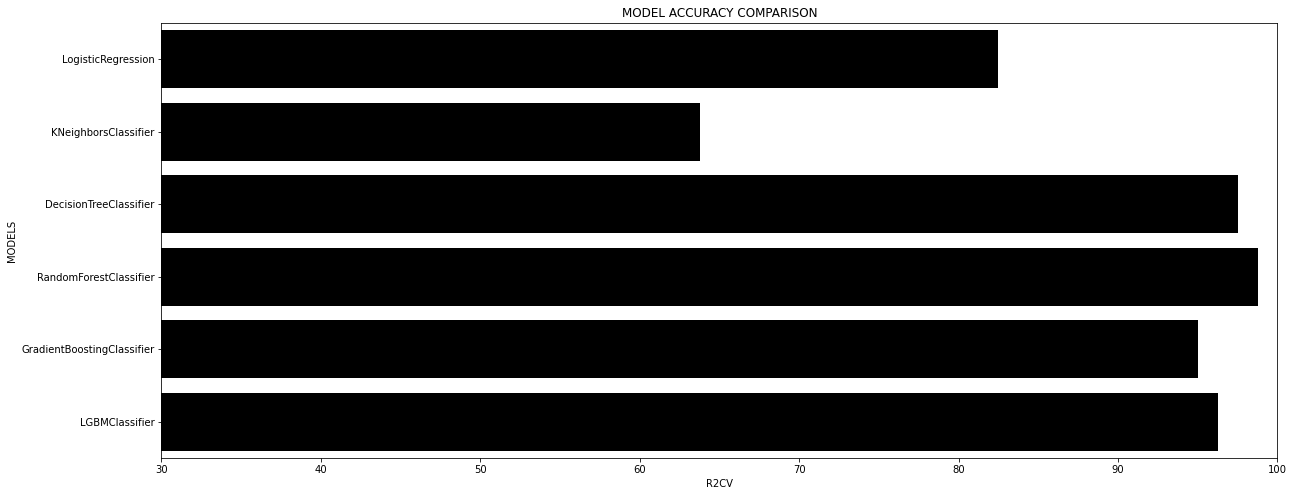

In [148]:
r = pd.DataFrame(columns=["MODELS","R2CV"])
for model in modelsc:
    name = model.__class__.__name__
    R2CV = cross_val_score(model,X_test,y_test,cv=10,verbose=False).mean()
    result = pd.DataFrame([[name,R2CV*100]],columns=["MODELS","R2CV"])
    r = r.append(result)
    
figure = plt.figure(figsize=(20,8))   
sns.barplot(x="R2CV",y="MODELS",data=r,color="k")
plt.xlabel("R2CV")
plt.ylabel("MODELS")
plt.xlim(30,100)
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

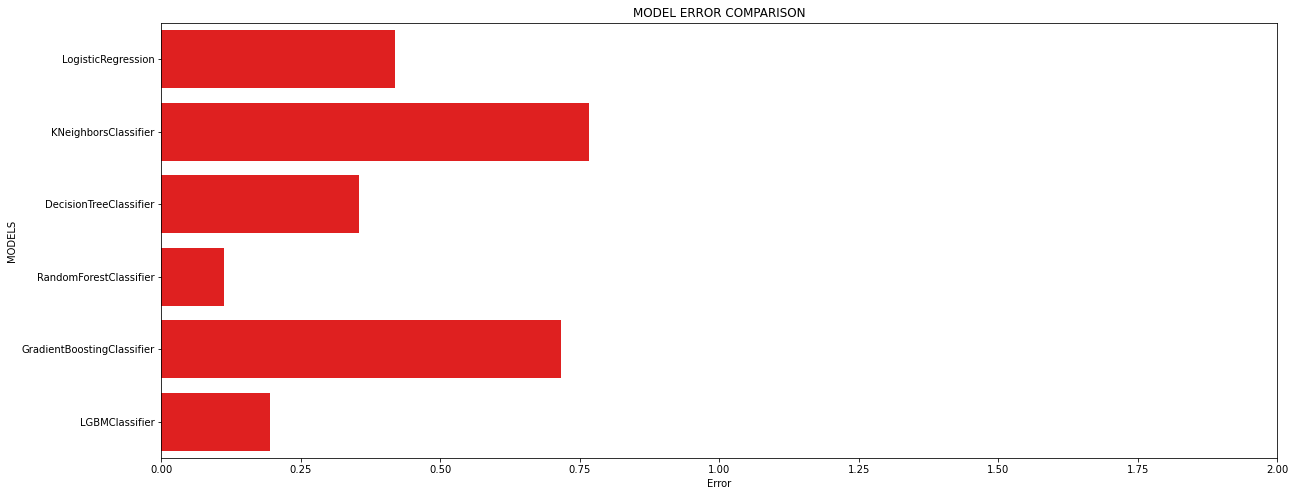

In [149]:
r = pd.DataFrame(columns=["MODELS","error"])
for model in modelsc:
    name = model.__class__.__name__
    error = -cross_val_score(model,X_test,y_test,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
    result = pd.DataFrame([[name,np.sqrt(error)]],columns=["MODELS","error"])
    r = r.append(result)
    
figure = plt.figure(figsize=(20,8))   
sns.barplot(x="error",y="MODELS",data=r,color="r")
plt.xlabel("Error")
plt.ylabel("MODELS")
plt.xlim(0,2)
plt.title("MODEL ERROR COMPARISON")
plt.show()

## Conclusion 

Random Forest is the best predicted model

We could improve the model accuracy by performing more feature engineering and also making data normally distributed